# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [2]:
# Libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

## Challenge 1

#### The data we will use in this challenge is:

In [3]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

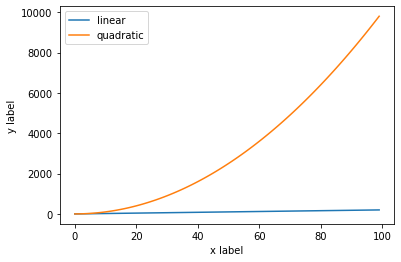

In [4]:
# Method 1
plt.plot(x,y, label = 'linear')
plt.plot(x,z, label = 'quadratic')

plt.xlabel('x label')
plt.ylabel('y label')
plt.legend()

plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

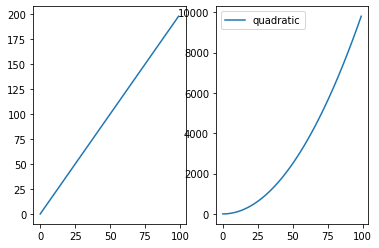

In [5]:
# Method 2
fig, axs = plt.subplots(nrows=1, ncols=2) 
#plt.subplot(211)

axs[0].plot(x,y, label = 'linear')
#plt.subplot(212)
axs[1].plot(x,z, label = 'quadratic') 

#plt.xlabel('x label')
#plt.ylabel('y label')
plt.legend()

plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

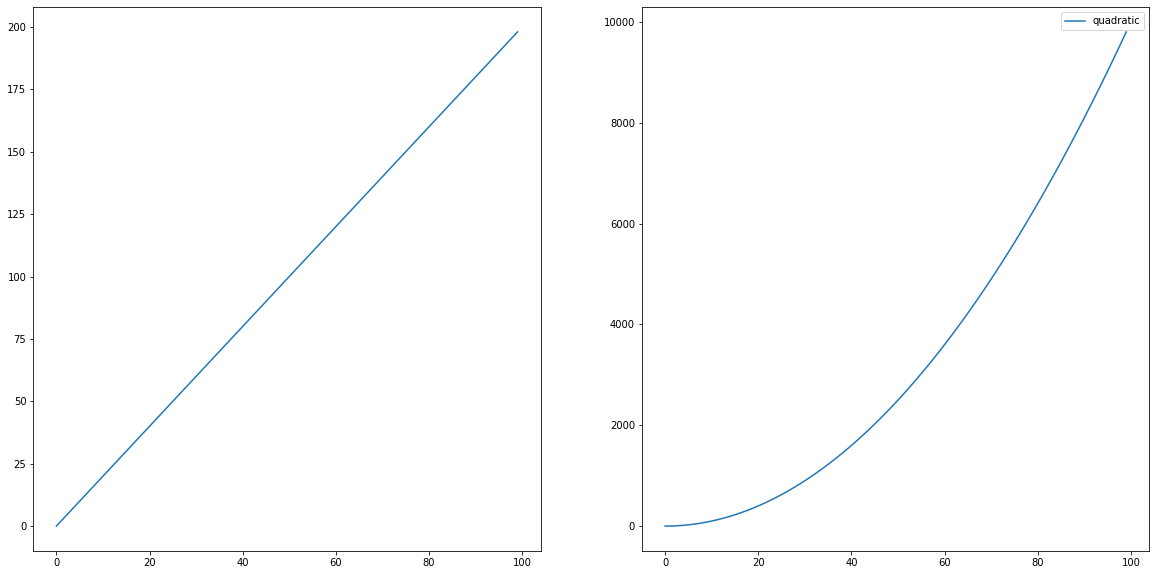

In [6]:
# your code here
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10)) 
#plt.subplot(211)
axs[0].plot(x,y, label = 'linear')
#plt.subplot(212)
axs[1].plot(x,z, label = 'quadratic') 

plt.legend()

plt.show()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

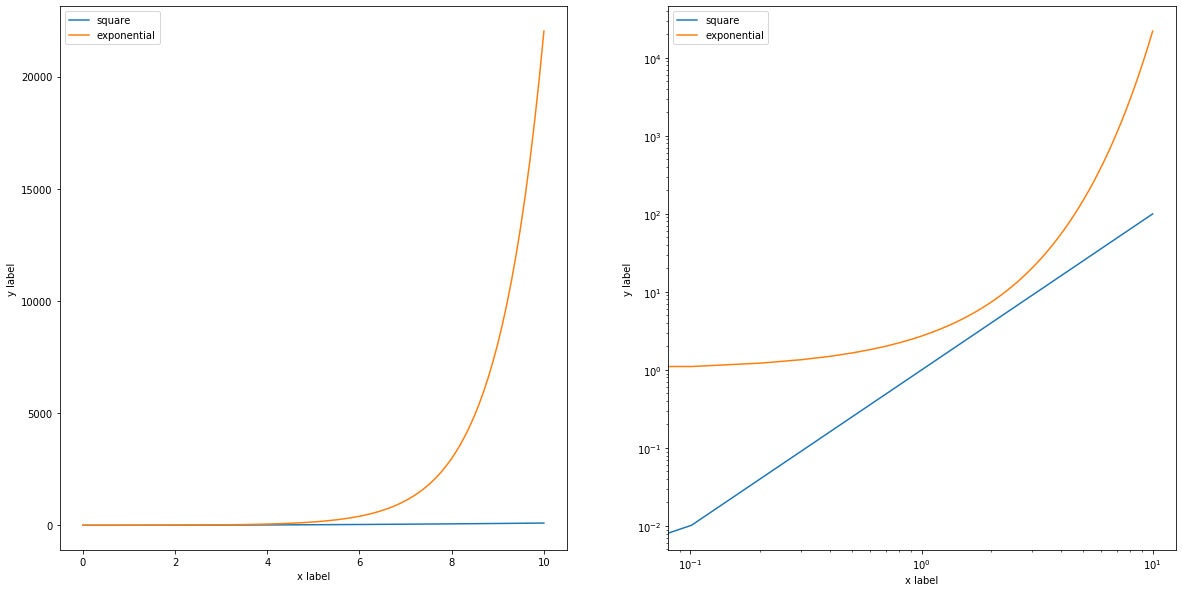

In [7]:
# your code here
x = np.linspace(0,10,100)

y1 = x**2
y2 = math.e**x

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10)) 

axs[0].plot(x,y1, label = 'square')
axs[0].plot(x,y2, label = 'exponential')
axs[0].set_xlabel('x label')
axs[0].set_ylabel('y label')
axs[0].legend()

axs[1].plot(x,y1, label = 'square')
axs[1].plot(x,y2, label = 'exponential')
plt.yscale('log')
plt.xscale('log')
axs[1].set_xlabel('x label')
axs[1].set_ylabel('y label')
axs[1].legend()

"""
plt.subplot(211)
plt.plot(x,y1) 
plt.plot(x,y2)


plt.subplot(212)
plt.plot(x,y2)
plt.plot(x,y1)
plt.yscale('log')
plt.xscale('log')
plt.title('log')
plt.grid(True)
"""
#fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10)) 

plt.show()

#### As a bonus challenge, try to add a legend to the plot.

In [8]:
# your code here
# Look above

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [9]:
# your code here
import pandas as pd
fitbit = pd.read_csv('Fitbit2.csv')

In [10]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [11]:
fitbit.shape

(367, 24)

In [12]:
columnz = fitbit.columns
print(columnz)
print(type(fitbit['Date']))

Index(['Date', 'Calorie burned', 'Steps', 'Distance', 'Floors',
       'Minutes Sedentary', 'Minutes Lightly Active', 'Minutes Fairly Active',
       'Minutes Very Active', 'Activity Calories', 'MinutesOfSleep',
       'MinutesOfBeingAwake', 'NumberOfAwakings', 'LengthOfRestInMinutes',
       'Distance_miles', 'Days', 'Days_encoded', 'Work_or_Weekend',
       'Hours Sleep', 'Sleep efficiency', 'Yesterday_sleep',
       'Yesterday_sleep_efficiency', 'Months', 'Months_encoded'],
      dtype='object')
<class 'pandas.core.series.Series'>


In [13]:
#refine = fitbit.drop(columns=['Date','generation','country-year'])
relevant = fitbit[['Months_encoded','Steps']]
month = relevant.groupby(['Months_encoded'], as_index=False).agg({'Steps':'median'})
month.head()

,Months_encoded,Steps
0,1,10366.0
1,2,9235.0
2,3,11122.0
3,4,13846.5
4,5,11998.0


In [14]:
relevant2 = fitbit[['Work_or_Weekend','Steps']]
WoW = relevant2.groupby(['Work_or_Weekend'], as_index=False).agg({'Steps':'median'})
WoW.head()

,Work_or_Weekend,Steps
0,0,9998.0
1,1,10445.5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

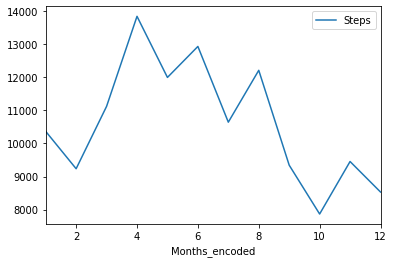

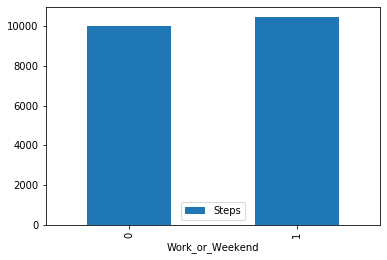

In [15]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here
month.plot(x = "Months_encoded", y = "Steps")

# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here
WoW.plot.bar(x = "Work_or_Weekend", y = "Steps")


#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

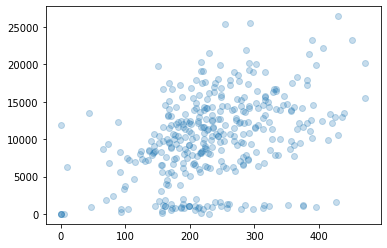

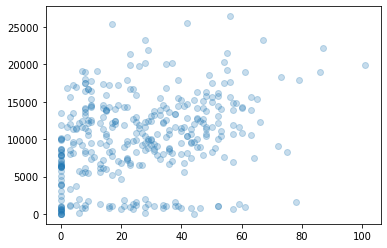

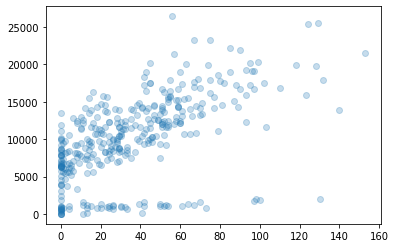

In [16]:
# your code here
fitbit1 = fitbit[['Minutes Lightly Active', 'Minutes Fairly Active', 'Minutes Very Active', "Steps"]]

count = 0
for i, column in enumerate(fitbit1):
    count = count + 1
    if count <= 3:
        plt.scatter(x = column, y = "Steps", data = fitbit1, alpha = 0.25)
        plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [17]:
# your code here
titanic_data = pd.read_csv("titanic.csv")

In [18]:
tita = titanic_data

#### Explore the titanic dataset using Pandas dtypes.

In [19]:
# your code here
tita.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [20]:
# NUMERICAL VARIABLES
# your code here
tita.select_dtypes(exclude=object)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [21]:
# CATEGORICAL VARIABLES
# your code here
tita.select_dtypes(include=object)

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [22]:
# your code here
#plt.set_size(12, 6)


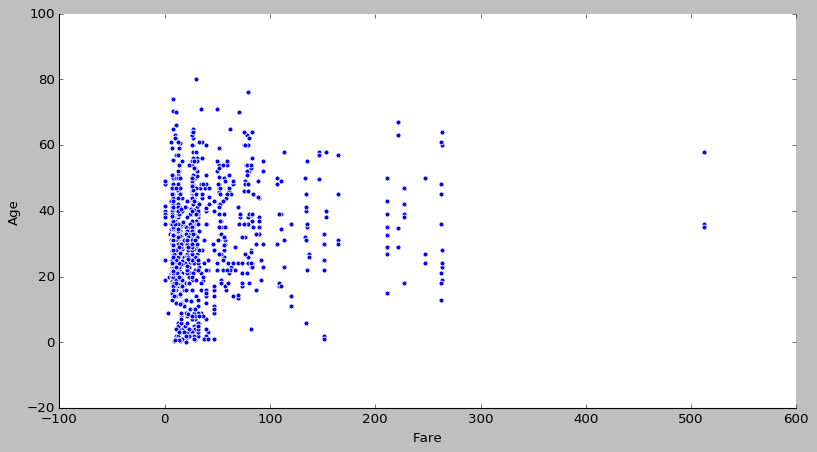

In [23]:
plt.style.use("classic")
#plt.rcParams['figure.figsize']=(12,6)
g = sns.relplot(x='Fare', y='Age', data=tita)
g.fig.set_size_inches(12,6)


#### Use the right visulalization to show the distribution of column `Age`.

Text(0, 0.5, 'Amount of People')

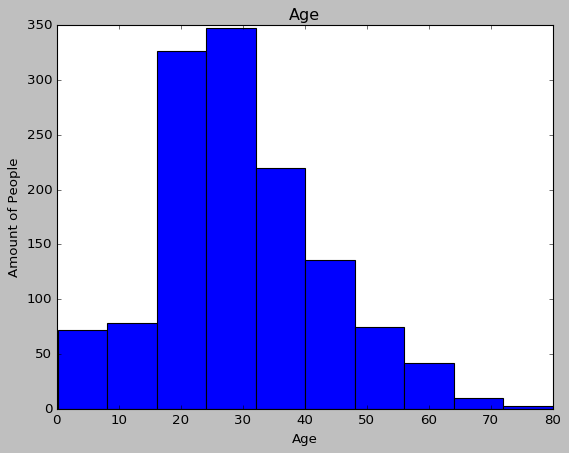

In [24]:
# your code here
plt.hist(tita['Age'])
plt.title("Age")
plt.xlabel("Age")
plt.ylabel("Amount of People")

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


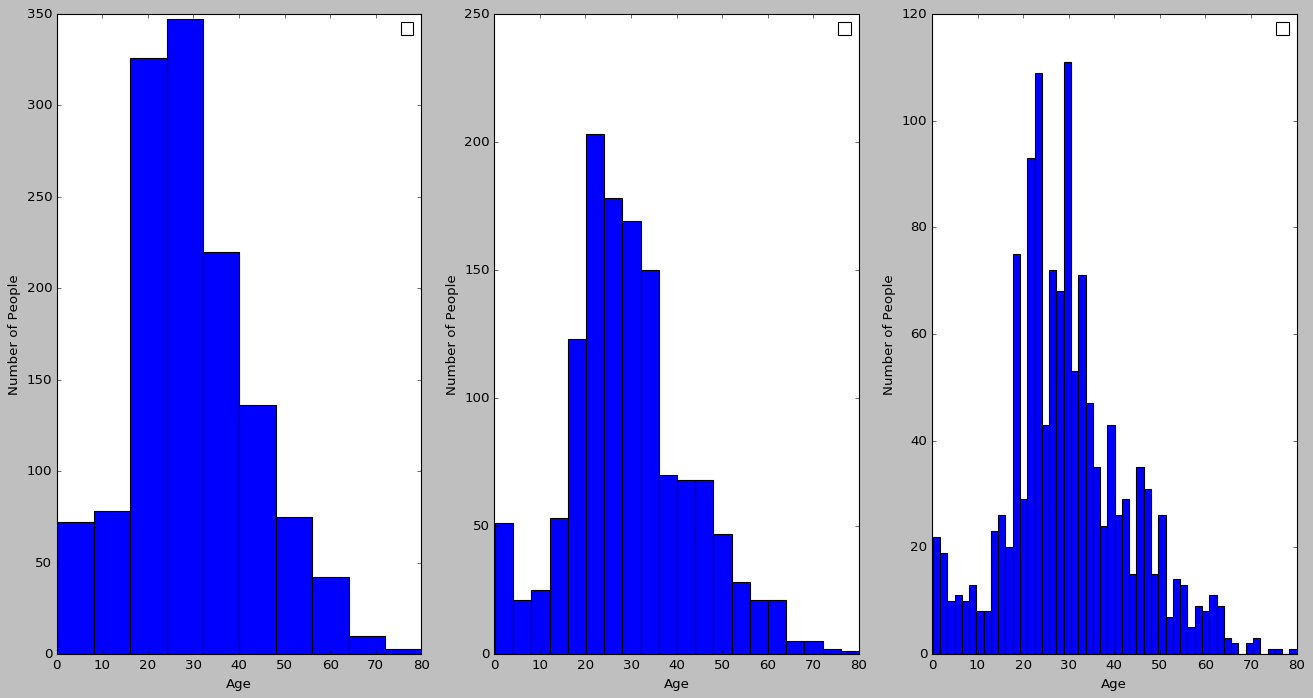

In [25]:
# your code here
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 10)) 

axs[0].hist(tita['Age'], bins= 10)
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Number of People')
axs[0].legend()

axs[1].hist(tita['Age'], bins= 20)
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Number of People')
axs[1].legend()

axs[2].hist(tita['Age'], bins= 50)
axs[2].set_xlabel('Age')
axs[2].set_ylabel('Number of People')
axs[2].legend()



#### How does the bin size affect your plot?

In [26]:
"""
your comments here:

We see the same age distribution but with different resolutions
"""

'\nyour comments here:\n\nWe see the same age distribution but with different resolutions\n'

#### Use seaborn to show the distribution of column `Age`.

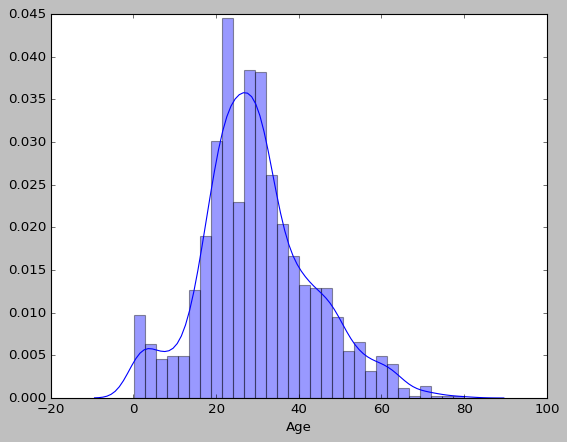

In [27]:
# your code here
sns.distplot(tita['Age'], bins= 30)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

(array([843., 466.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

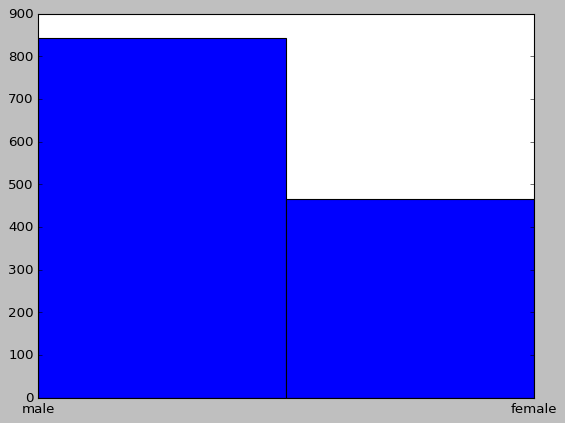

In [28]:
# Method 1 - matplotlib
# your code here
plt.hist(tita['Gender'], bins=2)

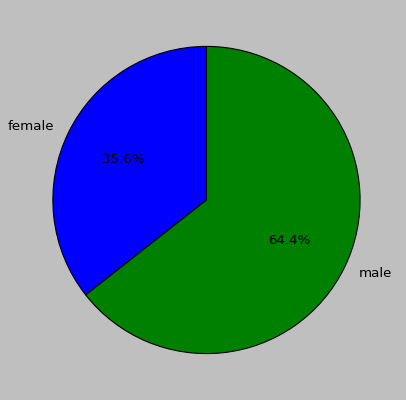

In [29]:
f = sum(tita["Gender"] == "female")/len(tita["Gender"])
m = sum(tita["Gender"] == "male")/len(tita["Gender"])
labels = ['female', 'male']
sizes = [f,m]

explode = (0, 0.1, 0)
plt.pie(sizes, labels=labels, autopct='%1.1f%%',  startangle=90)

plt.show()

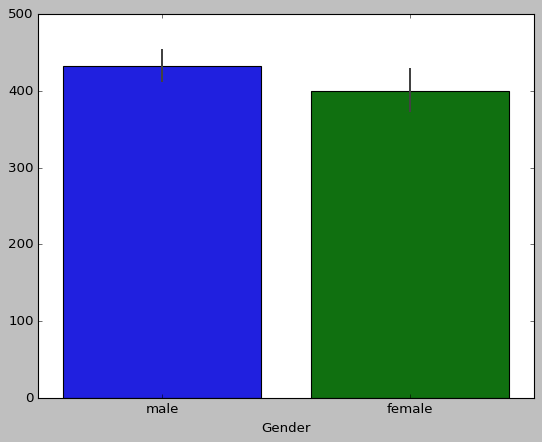

In [30]:
# Method 2 - seaborn
# your code here
g = sns.barplot(x=tita["Gender"], y = range(sum(tita["Gender"]=="male")))

#### Use the right plot to visualize the column `Pclass`.

Text(0.5, 1.0, 'Class')

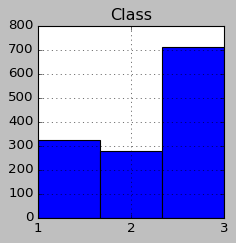

In [31]:
# your code here

fig, axs = plt.subplots(figsize=(3, 3))
axs.set_xticks([1,2,3])
tita['Pclass'].hist(bins=3)
plt.title("Class")

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

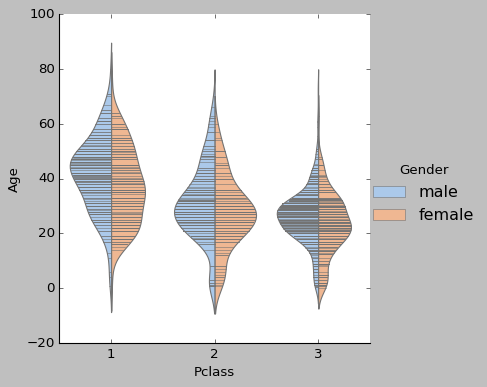

In [32]:
# your code here

sns.catplot(x="Pclass", y="Age", hue="Gender", kind="violin", inner="stick", split=True, palette="pastel", data=tita);


In [34]:
"""
your comments here:

A lot of old people in the first class.

People with children tend to travel on second or third class even if it may become their last ship cruise...
"""

'\nyour comments here:\n\nA lot of old people in the first class.\n\nPeople with children tend to travel on first or second class even if it may become their last ship cruise...\n'

#### What does the last plot tell you about the feature `Age`?

In [35]:
"""
your comments here:

A lot of old people in the first class.

People with children tend to travel on first or second class
"""

'\nyour comments here:\n\nA lot of old people in the first class.\n\nPeople with children tend to travel on first or second class\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [36]:
# your code here

"""
Already have it
"""

'\nAlready have it\n'

#### What additional information does the last plot provide about feature `Age`?

In [37]:
"""
your comments here
"""

'\nyour comments here\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

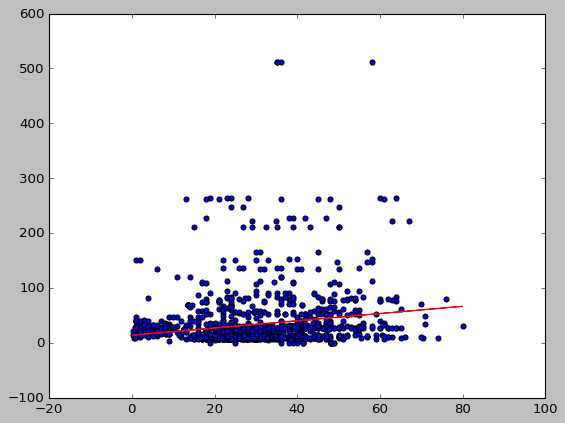

In [38]:
# Method 1 - matplotlib
# your code here
from scipy import stats
X = tita["Age"]
Y = tita['Fare']
slope, intercept, r_value, _, std_err = stats.linregress(X, Y)
plt.scatter(X, Y)
plt.plot(tita["Age"], slope*X + intercept, color = 'red')

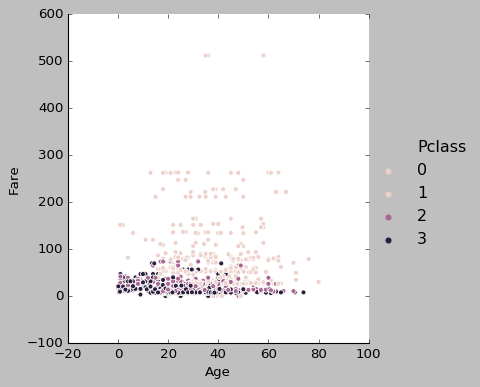

In [39]:
# Method 2 - seaborn
# your code here

sns.relplot(x='Age', y='Fare', hue = 'Pclass', data=tita)

#### Plot the correlation matrix using seaborn.

/home/jan/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/jan/.local/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


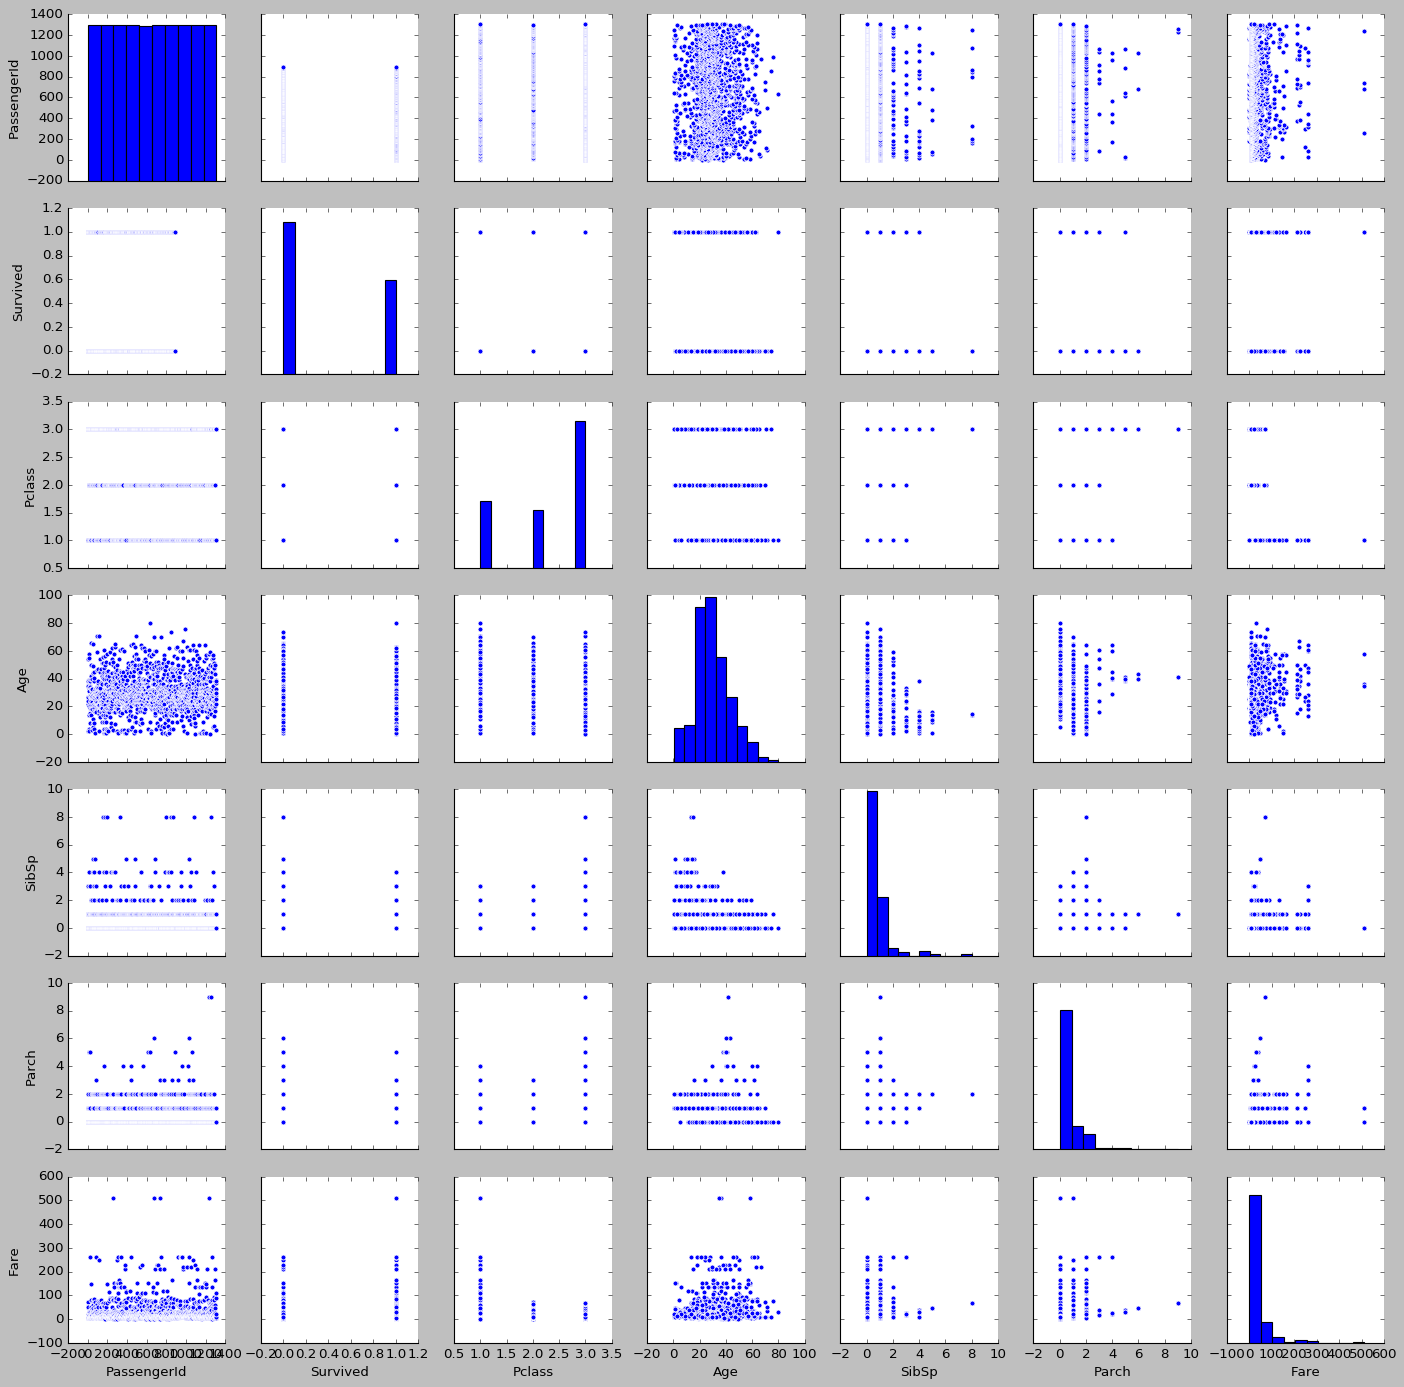

In [40]:
# your code here
sns.pairplot(tita)

#### What are the most correlated features?

In [41]:
"""
your comments here
Fare and Class
"""

'\nyour comments here\nFare and Class\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

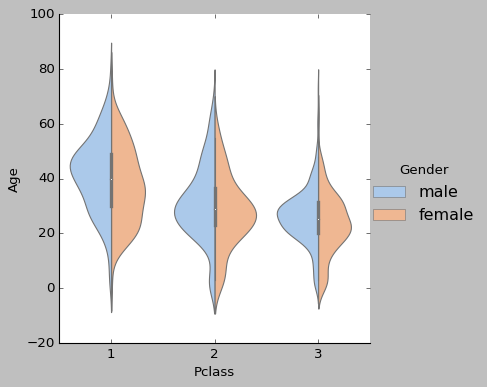

In [42]:
# your code here
sns.catplot(x="Pclass", y="Age", hue="Gender", kind="violin", split=True, palette="pastel", data=tita);


#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

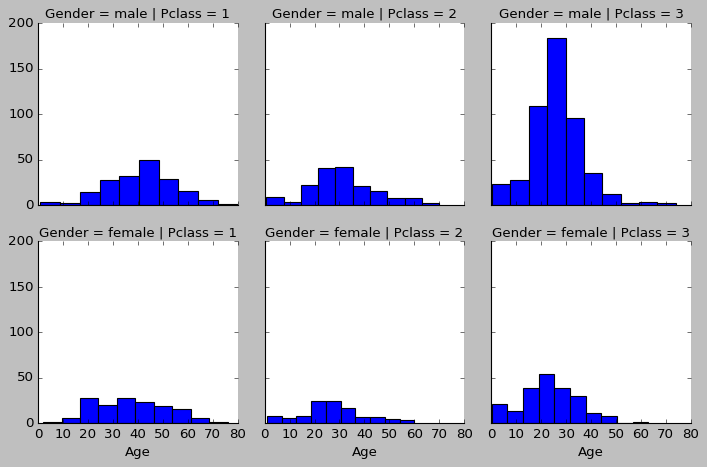

In [53]:
# your code here
g = sns.FacetGrid(data=tita, col="Pclass",  row="Gender")
g = g.map(plt.hist, "Age")